In [1]:
import sys
import torch

from torch.utils.data import Dataset, DataLoader
from pathlib import Path

import matplotlib.pyplot as plt

sys.path.append('..')
import loader

In [2]:
data_folder = Path('F:\Work2\drum-onset-detection\data\ADTOF-master\dataset')

In [3]:
dataloaders = loader.create_dataloaders(data_folder, 0.05, 0.9, 512, 1)

In [4]:
audio_path = data_folder / 'audio/audio/'
audio_files = list(audio_path.glob('*.wav'))

annotation_path = data_folder / 'annotations/one_hot/'
annotation_files = list(annotation_path.glob('*.npy'))

audio_files, annotation_files = loader.discard_missing_files(audio_files, annotation_files)

In [5]:
len(audio_files) == len(dataloaders['train']) + len(dataloaders['test']) + len(dataloaders['valid'])

True

In [6]:
itertrain = iter(dataloaders['train'])
itertest = iter(dataloaders['test'])
itertest = iter(dataloaders['test'])

In [9]:
example_out = next(itertrain)

C:\Users\jrhen\AppData\Local\Temp\ipykernel_10496\3936481072.py:8: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(spec)


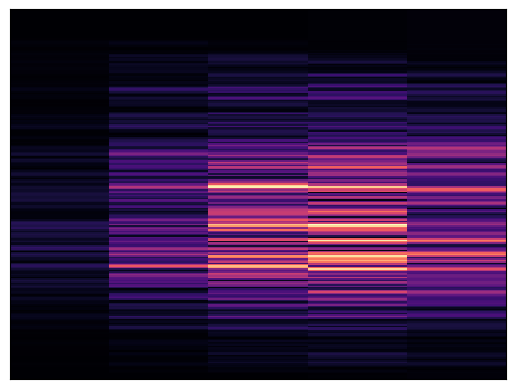

In [29]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

example_audio_frames = example_out[0].detach().numpy().squeeze(0).squeeze(0)
spec = librosa.stft(example_audio_frames[0], n_fft=512)
S_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
librosa.display.specshow(spec)

In [30]:
spec.shape

(257, 5)

In [ ]:
stft_frames = []
        for frame in audio_frames_np:
            stft_frames.append(librosa.stft(frame, n_fft=512))